<a href="https://colab.research.google.com/github/Vputri/Rekayasa-Komputasi/blob/main/Ujian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOAL 1

Tabel dan gambar di bawah ini adalah data antara jarak dan elevasi tanah
Jarak, x [m]                       10.3   15.4   21.7
Elevasi, z [m] (Metode Lagrange)  172.0  171.2  168.2


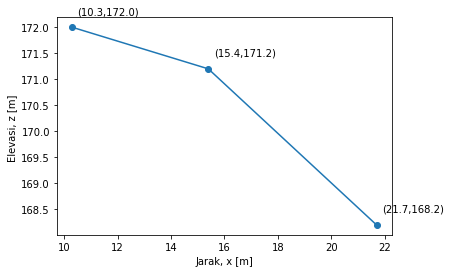


Cari dan temukan kurva polinomial kuadratik (second-order polynomial) melewati ketiga titik data tersebut dengan metode
(a) interpolasi Lagrange
(b) interpolasi Newton
Buat Program dan analisis yang luaranya berupa tabel seperti di bawah ini dan kurva seperti gambar diatas.



,"Jarak, x [m]","Elevasi, z [m] (Metode Lagrange)"
0,10.30,172
1,13.15,...
2,15.40,171.2
3,16.00,...
4,18.85,...
5,21.70,168.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x = [10.3, 15.4, 21.7]
y = [172.0, 171.2, 168.2]
df = pd.DataFrame(list(zip(x, y)), columns =['Jarak, x [m]', 'Elevasi, z [m] (Metode Lagrange)'])
df = df.set_index('Jarak, x [m]').T
print("Tabel dan gambar di bawah ini adalah data antara jarak dan elevasi tanah")
print(df)
plt.plot(x, y, marker = 'o')
plt.xlabel('Jarak, x [m]')
plt.ylabel('Elevasi, z [m] ')
for i in range(len(x)):
		t = "({},{})".format(x[i],y[i])
		plt.text(x[i]+0.2, y[i]+0.25, t) 
plt.show()
print("""
Cari dan temukan kurva polinomial kuadratik (second-order polynomial) melewati ketiga titik data tersebut dengan metode
(a) interpolasi Lagrange
(b) interpolasi Newton
Buat Program dan analisis yang luaranya berupa tabel seperti di bawah ini dan kurva seperti gambar diatas.
""")
x = x + [13.15, 16, 18.85]
y = y + ['...', '...', '...']
df = pd.DataFrame(list(zip(x, y)), columns =['Jarak, x [m]', 'Elevasi, z [m] (Metode Lagrange)'])
df.sort_values(by=['Jarak, x [m]'], ignore_index=True)

## Metode Lagrange

$f(x)=\sum_{i=0}^n L_{i}(x)f(x_{i})$

$L_{i}(x)=\Pi_{j\neq0}^n\frac{(t-t_{j})}{(t_{i}-t_{j})}$

In [ ]:
def Lagrange(x, y, xp):
  xp = xp
  yp = 0
  for i in range(len(x)):
    p = 1
    for j in range(len(x)):
      if j != i:
        p *= (xp-x[j])/(x[i]-x[j])
    yp += y[i] * p
  return yp

## Metode Noewton

$f(x)=f[x_{0}]+f[x_{0},x_{1}](x-x_{0})+...+f[x_{0},...,x_{k}](x-x_{0})(x-x_{1})...(x-x_{k-1})$


$f[x_{i},x_{i-1}]=\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}$



In [ ]:
import numpy as np
def newton_interpolation(X,Y,xp):
    sum=Y[0]
    temp=np.zeros((len(X),len(X)))
    for i in range(0,len(X)):
        temp[i,0]=Y[i]
    temp_sum=1.0
    for i in range(1,len(X)):
        temp_sum=temp_sum*(xp-X[i-1])
        for j in range(i,len(X)):
            temp[j,i]=(temp[j,i-1]-temp[j-1,i-1])/(X[j]-X[j-i])
        sum+=temp_sum*temp[i,i] 
    return sum

In [ ]:
x = [10.3, 15.4, 21.7]
y = [172.0, 171.2, 168.2]
xp = [13.15, 16, 18.85]
yl = []
yn = []
for i in xp:
  yl.append(Lagrange(x, y, i))
  yn.append(newton_interpolation(x,y,i))

In [ ]:
import pandas as pd
x.extend(xp)
y.extend(yl)
z = y
y.extend(yn)

df = pd.DataFrame(list(zip(x, y, z)), columns =['Jarak, x [m]', 'Elevasi, z [m] (Metode Lagrange)', 'Elevasi, z [m] (Metode Newton)'])
df.drop(df.loc[df['Jarak, x [m]']== 15.40].index, inplace=True)
df = df.sort_values(by=['Jarak, x [m]'], ignore_index=True)
df

,"Jarak, x [m]","Elevasi, z [m] (Metode Lagrange)","Elevasi, z [m] (Metode Newton)"
0,10.30,172.000000,172.000000
1,13.15,171.732563,171.732563
2,16.00,171.010084,171.010084
3,18.85,169.832563,169.832563
4,21.70,168.200000,168.200000


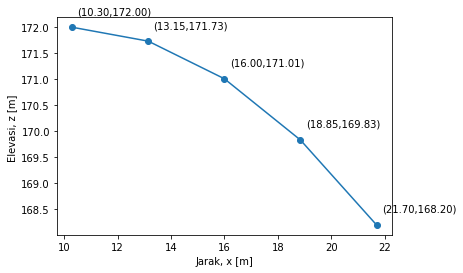

In [ ]:
import matplotlib.pyplot as plt
x = df['Jarak, x [m]']
y = df['Elevasi, z [m] (Metode Lagrange)']
plt.plot(x,y, marker = 'o')
plt.xlabel('Jarak, x [m]')
plt.ylabel('Elevasi, z [m] ')
for i in range(len(x)):
		t = "({:.2f},{:.2f})".format(x[i],y[i])
		plt.text(x[i]+0.2, y[i]+0.25, t) 
plt.show()

# SOAL 2

In [ ]:
!pip install quadpy



> Dengan Library



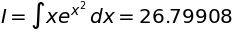


Hitung integral itu menggunakan pendekatan Gauss quadrature dengan
a. 2 Titik
b. 3 Titik
c. 4 Titik


In [ ]:
from sympy import *
import sympy as sp
sp.init_printing()

x, I = symbols('x I')
fx = Integral(exp(x**2)*x)
soal1 = sp.Eq(I, sp.Eq(fx, 26.79908))
display(soal1)
print("""
Hitung integral itu menggunakan pendekatan Gauss quadrature dengan
a. 2 Titik
b. 3 Titik
c. 4 Titik""")

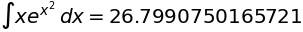

In [ ]:
import scipy.integrate as integrate

f = lambda x : (np.e**x**2)*x
a = 0
b = 2
I = integrate.quad(f,a,b)
soal1 = sp.Eq(fx, I[0])
display(soal1)



> TANPA LIBRARY


In [ ]:
import math
def f(x):
    return math.exp(x**2)*x

### 2 TITIK

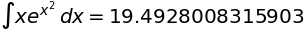

In [ ]:
def titik2(b, a):
  beda = (b-a)/2
  w = 1
  z = 1/math.sqrt(3)
  x1 = (beda*(-z))+beda
  x2 = (beda*z)+beda
  f1 = f(x1)
  f2 = f(x2)
  hasil=beda*((w*f1)+(w*f2))
  return hasil

soal1 = sp.Eq(fx, titik2(2, 0))
display(soal1)

### 3 TITIK

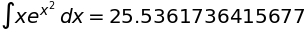

In [ ]:
def titik3(b, a):
  beda = (b-a)/2
  w1 = 5/9
  w2 = 8/9
  z = math.sqrt(3/5)
  z2 = 0
  x1 = (beda*(-z))+beda
  x2 = (beda*z2)+beda
  x3 = (beda*z)+beda
  f1 = f(x1)
  f2 = f(x2)
  f3 = f(x3)
  hasil=beda*((w1*f1)+(w2*f2)+(w1*f3))
  return hasil

soal1 = sp.Eq(fx, titik3(2, 0))
display(soal1)


### 4 TITIK

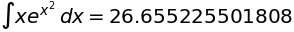

In [ ]:
def titik4(b, a):
  beda = (b-a)/2
  w1 = (18+math.sqrt(30))/36
  w2 = (18-math.sqrt(30))/36
  z1 = math.sqrt((3/7)-(2/7*math.sqrt(6/5)))
  z2 = math.sqrt((3/7)+(2/7*math.sqrt(6/5)))
  x1 = (beda*z1)+beda
  x2 = (beda*(-z1))+beda
  x3 = (beda*z2)+beda
  x4 = (beda*(-z2))+beda
  f1 = f(x1)
  f2 = f(x2)
  f3 = f(x3)
  f4 = f(x4)
  hasil=beda*((w1*f1)+(w1*f2)+(w2*f3)+(w2*f4))
  return hasil

soal1 = sp.Eq(fx, titik4(2, 0))
display(soal1)

# SOAL 3

In [ ]:
print("""Kecepatan laju kereta api dalam 8 detik pertama sejak saat mulai bergerak dari posisi berhenti dinyatakan dengan persamaan
matematis di bawah ini:
""")
v, t, x, dx, dt = symbols('v t x dx dt')
soal1 = sp.Eq(v, sp.Eq(dx/dt, 5*exp(0.5*t)-0.8*x))
display(soal1)
print("""
Dalam persamaan tersebut, v adalah kecepatan laju kereta api dalam satuan meter per detik, t adalah waktu dalam selang 0 s.d.
8 detik, dan x adalah jarak dari titik awal dalam satuan meter.

Hitung posisi kereta api dari titik awal (x[m]) tiap selang 2 detik (t = 0, 2, 4, 6, 8 [s]) dengan metode Runge-kuta orde 2.
Penyelesaian dilakukan dengan hand calculation dan program.""")

Kecepatan laju kereta api dalam 8 detik pertama sejak saat mulai bergerak dari posisi berhenti dinyatakan dengan persamaan
matematis di bawah ini:




Dalam persamaan tersebut, v adalah kecepatan laju kereta api dalam satuan meter per detik, t adalah waktu dalam selang 0 s.d.
8 detik, dan x adalah jarak dari titik awal dalam satuan meter.

Hitung posisi kereta api dari titik awal (x[m]) tiap selang 2 detik (t = 0, 2, 4, 6, 8 [s]) dengan metode Runge-kuta orde 2.
Penyelesaian dilakukan dengan hand calculation dan program.


In [ ]:
import math
from sympy.abc import phi
def f(t, x):
    return 5*math.exp(0.5*t)-(0.8*x)

def rungeKutta(t0, x0, tn, n):
    result = []
    h = tn-t0
    for i in range(n):
        k1 = f(t0, x0)
        a = t0 + 0.75 * h
        b = x0 + 0.75 * k1 * h
        k2 = f(a, b)
        c = (1/3*k1+2/3*k2)
        x = x0 + c*h
        hasil = [t0, x0, k1, a, b, k2, c, x]
        result.append(hasil)
        x0 = x
        t0 = t0 + h
    return result

t0 = 0
x0 = 0
tn = 2
banyak = 5
hasil = rungeKutta(t0,x0,tn,banyak)
df = pd.DataFrame(hasil, columns = ['ti', 'xi', 'k1', 'ti+3/4h', 'xi+3/4hk1','k2', pretty(phi),'xi+1'])
df

,ti,xi,k1,ti+3/4h,xi+3/4hk1,k2,φ,xi+1
0,0,0.000000,5.000000,1.5,7.500000,4.585000,4.723333,9.446667
1,2,9.446667,6.034076,3.5,18.497780,13.974789,11.327885,32.102436
2,4,32.102436,11.263332,5.5,48.997434,39.015213,29.764586,91.631607
3,6,91.631607,27.122399,7.5,132.315205,106.753246,80.209630,252.050867
4,8,252.050867,71.350056,9.5,359.075952,290.660661,217.557126,687.165120


# SOAL 4

In [ ]:
from sympy.abc import sigma
print("""Perpindahan radial u dari sebuah silinder berongga tebal bertekanan (jari2 dalam = 5″, jari2 luar = 8″)
diberikan pada lokasi yang berbeda secara radial.
""")
x = [5.0, 5.6, 6.2, 6.8, 7.4, 8.0]
y = [0.0038731, 0.0036165, 0.0034222, 0.0032743, 0.0031618, 0.0030769]
df = pd.DataFrame(list(zip(x, y)), columns =['Radius (in)', 'Radius Displacement (in)'])
print(df.to_string(index=False))
print("""
Tegangan normal maksimum, dalam psi, pada silinder diberikan oleh:
""")
a, b, c, d, e, u, f, du, dr = symbols('3.2967 10 6 5 0.3 u (5) du dr')
=  (a * b ** c) * (( u * f/ d)+ (e * du/dr * f))
soal1 = sp.Eq(sigma, expr)
display(expr)
print("""
Tentukan tegangan maksimum, dalam psi, dengan akurasi orde kedua Buat Programnya!""")